# CBB Matchup Analyzer – Hello World

This notebook is a minimal “hello world” scaffold for a college basketball (CBB) matchup analyzer.

In this step we will:
- Verify the Python environment and core libraries
- Create a tiny synthetic game log dataset for a few teams
- Compute basic tempo (possessions) and efficiency (PPP)
- Visualize a simple relationship (tempo vs offensive efficiency)

This is just a scaffold; later notebooks will:
- Load real game data
- Build matchup projections
- Compare to sportsbook lines and flag anomalies

Python version: 3.10.12
NumPy version: 2.2.6
Pandas version: 2.3.3
Matplotlib version: 3.10.8


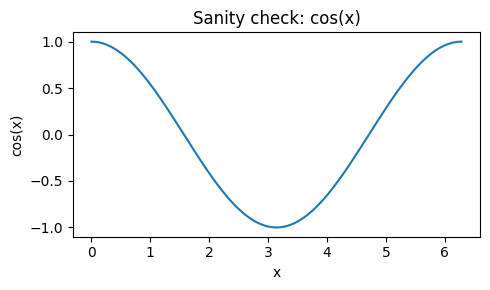

In [3]:
# Step 2: Environment check inside the notebook

import sys

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

print("Python version:", sys.version.split()[0])
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)

# Quick smoke test plot
xs = np.linspace(0, 2 * np.pi, 200)
ys = np.cos(xs)

plt.figure(figsize=(5, 3))
plt.plot(xs, ys)
plt.title("Sanity check: cos(x)")
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.tight_layout()
plt.show()

In [4]:
# Step 2: Tiny synthetic CBB game log

# We'll create a few fake games for two teams
data = [
    # date, team, opponent, pts_for, pts_against, fga, fta, orb, tov
    ("2025-12-01", "Team A", "Team B", 78, 72, 55, 20, 10, 12),
    ("2025-12-05", "Team A", "Team C", 82, 75, 58, 18, 9,  11),
    ("2025-12-08", "Team B", "Team A", 70, 80, 52, 22, 11, 14),
    ("2025-12-10", "Team B", "Team C", 65, 68, 50, 15, 8,  13),
]

columns = ["date", "team", "opponent", "pts_for", "pts_against", "fga", "fta", "orb", "tov"]

games = pd.DataFrame(data, columns=columns)
games["date"] = pd.to_datetime(games["date"])

games

,date,team,opponent,pts_for,pts_against,fga,fta,orb,tov
0,2025-12-01,Team A,Team B,78,72,55,20,10,12
1,2025-12-05,Team A,Team C,82,75,58,18,9,11
2,2025-12-08,Team B,Team A,70,80,52,22,11,14
3,2025-12-10,Team B,Team C,65,68,50,15,8,13


In [5]:
# Step 2: Compute possessions, offensive PPP, defensive PPP

def estimate_possessions(row: pd.Series) -> float:
    """
    Classic estimate:
    Poss = FGA - ORB + TOV + 0.475 * FTA
    """
    return row["fga"] - row["orb"] + row["tov"] + 0.475 * row["fta"]

games["poss"] = games.apply(estimate_possessions, axis=1)
games["opp_poss"] = games["poss"]  # symmetric in this simple model

games["off_ppp"] = games["pts_for"] / games["poss"]
games["def_ppp"] = games["pts_against"] / games["opp_poss"]

games


,date,team,opponent,pts_for,pts_against,fga,fta,orb,tov,poss,opp_poss,off_ppp,def_ppp
0,2025-12-01,Team A,Team B,78,72,55,20,10,12,66.500,66.500,1.172932,1.082707
1,2025-12-05,Team A,Team C,82,75,58,18,9,11,68.550,68.550,1.196207,1.094092
2,2025-12-08,Team B,Team A,70,80,52,22,11,14,65.450,65.450,1.069519,1.222307
3,2025-12-10,Team B,Team C,65,68,50,15,8,13,62.125,62.125,1.046278,1.094567


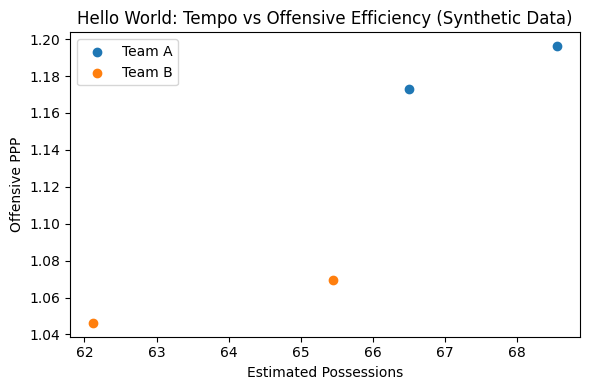

In [6]:
# Step 2: Simple visualization – tempo vs offensive efficiency

plt.figure(figsize=(6, 4))

for team in games["team"].unique():
    sub = games[games["team"] == team]
    plt.scatter(sub["poss"], sub["off_ppp"], label=team)

plt.xlabel("Estimated Possessions")
plt.ylabel("Offensive PPP")
plt.title("Hello World: Tempo vs Offensive Efficiency (Synthetic Data)")
plt.legend()
plt.tight_layout()
plt.show()
